<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [98]:
import pandas as pd

Load the dataset into a dataframe.


In [99]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [100]:
! pip install seaborn==0.11.2

In [101]:
# your code goes here
# Finding missing values:
bool_missing = df['ConvertedComp'].isnull()
count_missing = 0
missing_value_index_list = []
for index,value in enumerate(bool_missing):
    if value:
        count_missing += 1
        missing_value_index_list.append(index)
        
print('Numner of missing values:', count_missing)


Numner of missing values: 816


In [102]:
# Droping missing values:
df.dropna(subset = ['ConvertedComp'], inplace=True)

bool_missing = df['ConvertedComp'].isnull()
count_missing = 0
missing_value_index_list = []
for index,value in enumerate(bool_missing):
    if value:
        count_missing += 1
        missing_value_index_list.append(index)
        
df.reset_index(drop=True, inplace=True)
print('Numner of missing values:', count_missing)


Numner of missing values: 0


<AxesSubplot:xlabel='ConvertedComp'>

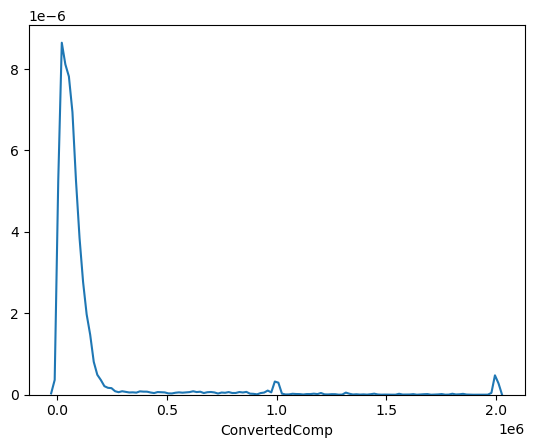

In [108]:
# Ploting distribution curve:
import seaborn as sns
sns.distplot(df['ConvertedComp'], hist=False)

Plot the histogram for the column `ConvertedComp`.


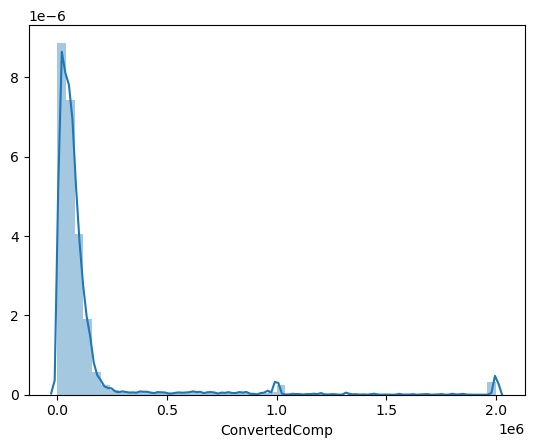

In [106]:
# your code goes here
ax1 = sns.distplot(df['ConvertedComp'], hist=True)

What is the median of the column `ConvertedComp`?


In [56]:
# your code goes here
print( 'The median is:', df['ConvertedComp'].median())

The median is: 57745.0


How many responders identified themselves only as a **Man**?


In [57]:
# your code goes here
print(df['Gender'].value_counts())
print('')
print('Number of responders identifing themselves only as a Man:', df['Gender'].value_counts()[0])

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Number of responders identifing themselves only as a Man: 9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [73]:
# your code goes here
woman_count = 0
converted_comp_woman_list = []
for index, value in enumerate(df['Gender']):
    if value == 'Woman':
        woman_count += 1
        coverted_comp = df['ConvertedComp'][index]
        converted_comp_woman_list.append(coverted_comp)


print('Number of responders identifing themselves only as a Woman:', woman_count)
converted_comp_woman_list = sorted(converted_comp_woman_list)
median_index = (len(converted_comp_woman_list)+1) //2
median = converted_comp_woman_list[median_index]
print('Median ConvertedComp of responders identified themselves only as a Woman:', median)

Number of responders identifing themselves only as a Woman: 679
Median ConvertedComp of responders identified themselves only as a Woman: 58000.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [78]:
# your code goes here
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


228


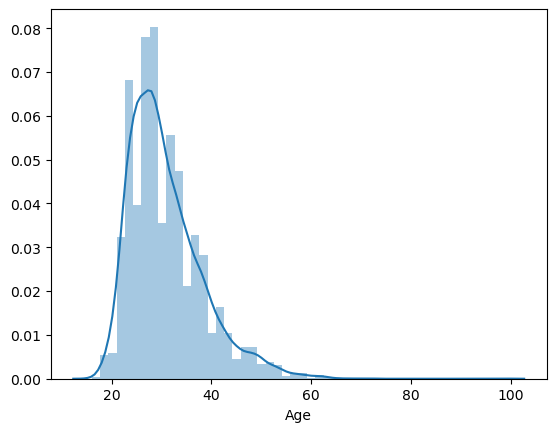

In [111]:
# your code goes here

# removing Nan values
bool_missing = df['Age'].isnull()
missing_count = 0
for value in bool_missing:
    if value:
        missing_count += 1
        
print(missing_count)
df.dropna(subset = ['Age'], inplace=True)
df.reset_index(drop=True, inplace=True)

# ploting histogram
ax3 = sns.distplot(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


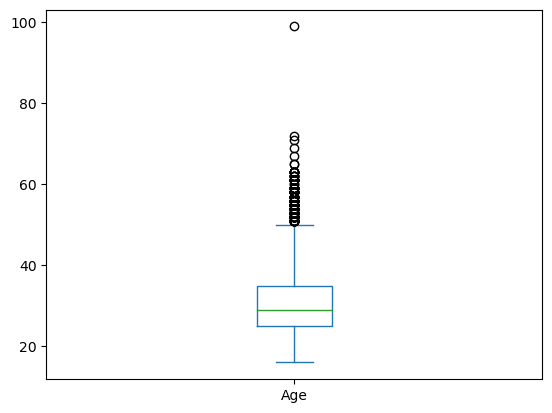

In [113]:
# your code goes here
import matplotlib.pyplot as plt
df['Age'].plot(kind='box')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [123]:
# your code goes here
info_series = df['ConvertedComp'].describe()
print('The Inter Quartile Range for the column ConvertedComp is:', info_series[6] - info_series[4])

The Inter Quartile Range for the column ConvertedComp is: 73165.5


Find out the upper and lower bounds.


In [124]:
# your code goes here
print('Q1=', info_series[4])
print('Q3=', info_series[6])

Q1= 26834.5
Q3= 100000.0


Identify how many outliers are there in the `ConvertedComp` column.


Number of outliers: 861


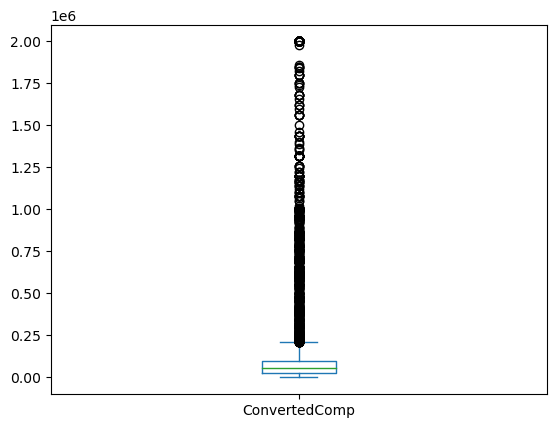

In [132]:
# your code goes here

q1 = info_series[4]
q3 = info_series[6]
iqr = info_series[6] - info_series[4]
outliers_count = 0
outliers_index = []
for index, value in enumerate(df['ConvertedComp']):
    if value > (q3+1.5*iqr) or value < (q1-1.5*iqr):
        outliers_count += 1
        outliers_index.append(index)
        
print('Number of outliers:', outliers_count)

df['ConvertedComp'].plot(kind='box')
plt.show()

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [136]:
# your code goes here
print('shape of previos df', df.shape)
df.drop(outliers_index, inplace=True)
print('shape of new df', df.shape)


shape of previos df (10354, 85)
shape of new df (9493, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [151]:
# your code goes here
# print(df.describe())
print('shape befor droping more missing values:', df.shape)
df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs'], inplace=True)
print('shape after droping missing values:', df.shape)

from scipy import stats
print(f'Column name: pearson_coef ---> p_value')

pearson_coef, p_value = stats.pearsonr(df['Age'], df['Respondent'])
print(f'Respondent: {pearson_coef} ---> {p_value}')
pearson_coef, p_value = stats.pearsonr(df['Age'], df['CompTotal'])
print(f'CompTotal: {pearson_coef} ---> {p_value}')
pearson_coef, p_value = stats.pearsonr(df['Age'], df['ConvertedComp'])
print(f'ConvertedComp: {pearson_coef} ---> {p_value}')
pearson_coef, p_value = stats.pearsonr(df['Age'], df['WorkWeekHrs'])
print(f'WorkWeekHrs: {pearson_coef} ---> {p_value}')
pearson_coef, p_value = stats.pearsonr(df['Age'], df['CodeRevHrs'])
print(f'CodeRevHrs: {pearson_coef} ---> {p_value}')

shape befor droping more missing values: (9493, 85)
shape after droping missing values: (7429, 85)
Column name: pearson_coef ---> p_value
Respondent: 0.013386943153002089 ---> 0.24862309794272286
CompTotal: 0.007805893694095944 ---> 0.5011382525454157
ConvertedComp: 0.4040327633308421 ---> 8.58062463231539e-290
WorkWeekHrs: 0.03127805968402128 ---> 0.007015377107370988
CodeRevHrs: -0.008640532396222507 ---> 0.45649524741177755


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
